In [6]:
#lets first read in the data from the cleaned csv file
import pandas as pd

df = pd.read_csv('insurance_claims_cleaned_fixed.csv')


Claim Circumstances
-------------------
authorities_contacted, police_report_available, 
property_damage, bodily_injuries, witnesses
→ These can indicate suspicious or unusual claim circumstances.

In [7]:
counts = df.groupby('authorities_contacted')['fraud_reported'].value_counts()
counts

authorities_contacted     fraud_reported
Ambulance                 No                139
                          Yes                57
Fire                      No                163
                          Yes                60
No Authorities Contacted  No                 85
                          Yes                 6
Other                     No                135
                          Yes                63
Police                    No                231
                          Yes                61
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

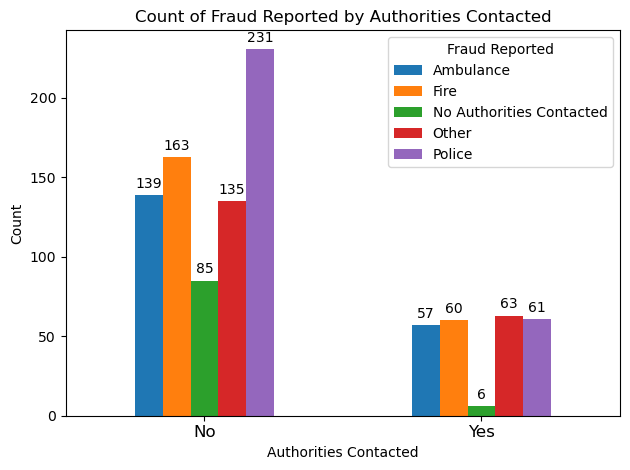

In [35]:
#lets visualize counts
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
ax = df.groupby('fraud_reported')['authorities_contacted'].value_counts().unstack().plot(kind='bar', stacked = False)

# Add count labels on bars
for container in ax.containers:
    ax.bar_label(container, padding=3)

for label in ax.get_xticklabels():
    label.set_rotation(0)
    label.set_fontsize(12)
plt.xlabel('Authorities Contacted')
plt.ylabel('Count')
plt.title('Count of Fraud Reported by Authorities Contacted')
plt.legend(title='Fraud Reported')
plt.tight_layout()
plt.show()

In [9]:
df.groupby('fraud_reported')['authorities_contacted'].value_counts(normalize=True)

fraud_reported  authorities_contacted   
No              Police                      0.306773
                Fire                        0.216467
                Ambulance                   0.184595
                Other                       0.179283
                No Authorities Contacted    0.112882
Yes             Other                       0.255061
                Police                      0.246964
                Fire                        0.242915
                Ambulance                   0.230769
                No Authorities Contacted    0.024291
Name: proportion, dtype: float64

<Figure size 1000x600 with 0 Axes>

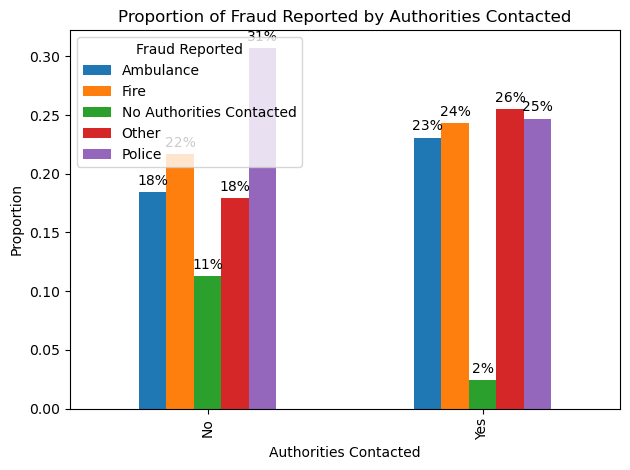

In [28]:
#lets visualise this
plt.figure(figsize=(10, 6))
ax = df.groupby('fraud_reported')['authorities_contacted'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = False)

#now lets put proportions on the chart
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.0f}%' for v in container], padding=3)

plt.xlabel('Authorities Contacted')
plt.ylabel('Proportion')
plt.title('Proportion of Fraud Reported by Authorities Contacted')
plt.legend(title='Fraud Reported')
plt.tight_layout()
plt.show()

Most claims are not fraudulent, regardless of authority. It is not sufficient on its own to predict fraud. 

In [10]:
#Now lets look at police reports and fraud
counts = df.groupby('police_report_available')['fraud_reported'].value_counts()
print(counts)

police_report_available  fraud_reported
No                       No                257
                         Yes                86
Unknown                  No                254
                         Yes                89
Yes                      No                242
                         Yes                72
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

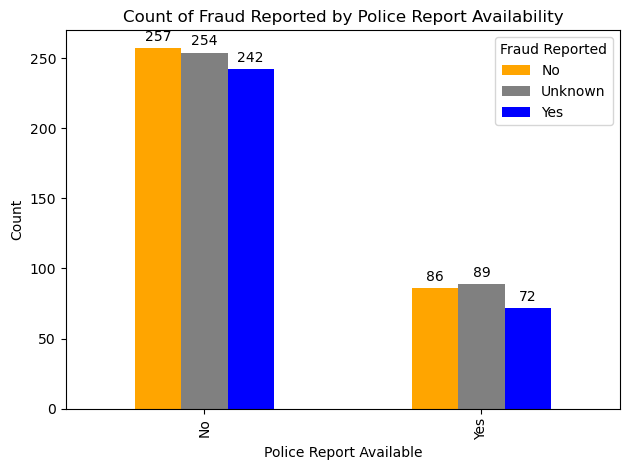

In [39]:
#lets visualize counts using a bar chart
plt.figure(figsize = (10, 6))

# Define custom colors: 'Yes' as blue, 'No' as orange
custom_colors = {'Yes': 'blue', 'No': 'orange', 'Y': 'blue', 'N': 'orange'}

# Prepare data for plotting
plot_data = df.groupby('fraud_reported')['police_report_available'].value_counts().unstack()

# Get the order of columns to match colors
col_order = plot_data.columns.tolist()
colors = [custom_colors.get(col, 'gray') for col in col_order]

ax = plot_data.plot(kind = 'bar', stacked = False, color=colors)

for container in ax.containers:
    ax.bar_label(container, padding = 3)

plt.xlabel('Police Report Available')
plt.ylabel('Count')
plt.title('Count of Fraud Reported by Police Report Availability')
plt.legend(title='Fraud Reported')
plt.tight_layout()
plt.show()

In [ ]:
df.groupby('fraud_reported')['police_report_available'].value_counts(normalize=True)

fraud_reported  police_report_available
No              No                         0.341301
                Unknown                    0.337317
                Yes                        0.321381
Yes             Unknown                    0.360324
                No                         0.348178
                Yes                        0.291498
Name: proportion, dtype: float64

<Figure size 1000x600 with 0 Axes>

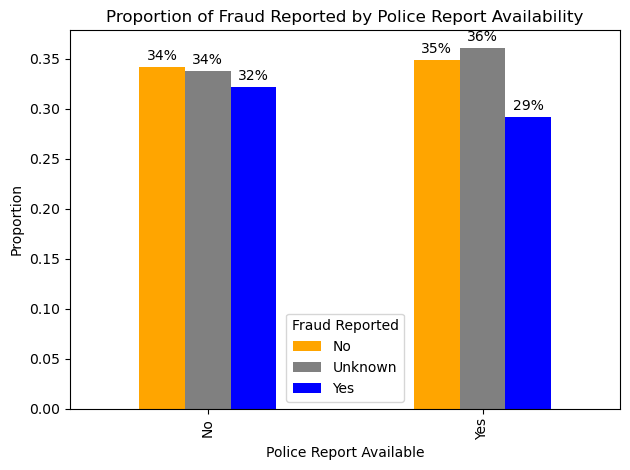

In [43]:
#lets visualize proportions
plt.figure(figsize=(10,6))

# Define custom colors: 'Yes' as blue, 'No' as orange
custom_colors = {'Yes': 'blue', 'No': 'orange', 'Y': 'blue', 'N': 'orange'}

# Prepare data for plotting
plot_data = df.groupby('fraud_reported')['police_report_available'].value_counts(normalize=True).unstack()

# Get the order of columns to match colors
col_order = plot_data.columns.tolist()
colors = [custom_colors.get(col, 'gray') for col in col_order]

ax = plot_data.plot(kind='bar', stacked=False, color=colors)

for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.0f}%' for v in container], padding=3)

plt.xlabel('Police Report Available')
plt.ylabel('Proportion')
plt.title('Proportion of Fraud Reported by Police Report Availability')
plt.legend(title='Fraud Reported')
plt.tight_layout()
plt.show()

In [12]:
#now lets take a look at property damage and fraud
counts = df.groupby('property_damage')['fraud_reported'].value_counts()
print(counts)


property_damage  fraud_reported
No               No                272
                 Yes                66
Unknown          No                257
                 Yes               103
Yes              No                224
                 Yes                78
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

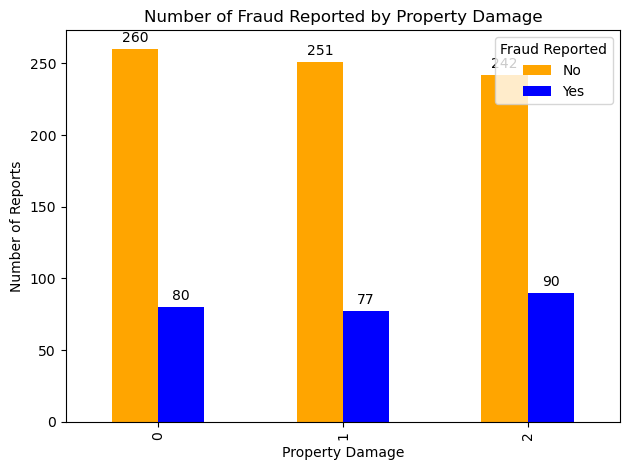

In [48]:
# Define custom colors: 'Yes' as blue, 'No' as orange
custom_colors = {'Yes': 'blue', 'No': 'orange', 'Y': 'blue', 'N': 'orange'}  # covers both possible encodings

# Prepare data for plotting
plot_data = counts.unstack() if hasattr(counts, 'unstack') else counts

# Get the order of columns to match colors
col_order = plot_data.columns.tolist()
colors = [custom_colors.get(col, 'gray') for col in col_order]



plt.figure(figsize=(10, 6))
ax = plot_data.plot(kind='bar', stacked=False, color=colors)

for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.xlabel('Property Damage')
plt.ylabel('Number of Reports')
plt.title('Number of Fraud Reported by Property Damage')
plt.legend(title='Fraud Reported', labels=[col for col in col_order])
plt.tight_layout()
plt.show()


In [49]:
df.groupby('fraud_reported')['property_damage'].value_counts(normalize=True)


fraud_reported  property_damage
No              No                 0.361222
                Unknown            0.341301
                Yes                0.297477
Yes             Unknown            0.417004
                Yes                0.315789
                No                 0.267206
Name: proportion, dtype: float64

<Figure size 1000x600 with 0 Axes>

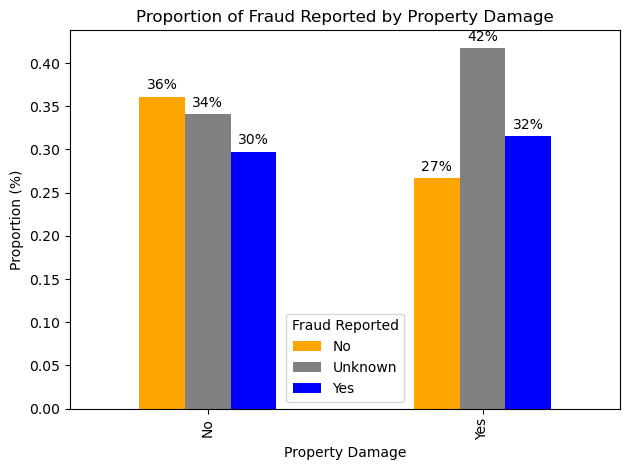

In [54]:
# Let's visualize proportions as percentages
plt.figure(figsize=(10, 6))

# Define custom colors: 'Yes' as blue, 'No' as orange
custom_colors = {'Yes': 'blue', 'No': 'orange', 'Y': 'blue', 'N': 'orange'}

# Prepare normalized data for plotting percentages
plot_data = df.groupby('fraud_reported')['property_damage'].value_counts(normalize=True).unstack()

# Get the order of columns to match colors
col_order = plot_data.columns.tolist()
colors = [custom_colors.get(col, 'gray') for col in col_order]

ax = plot_data.plot(kind='bar', stacked=False, color=colors)

# Let's visualize proportions on the chart
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.0f}%' for v in container], padding=3)

plt.xlabel('Property Damage')
plt.ylabel('Proportion (%)')
plt.title('Proportion of Fraud Reported by Property Damage')
plt.legend(title='Fraud Reported', labels=[col for col in col_order])
plt.tight_layout()
plt.show()

The "Unknown" category for property damage is associated with a higher likelihood of fraud, while "No" property damage is associated with a lower likelihood. However, as with authorities contacted, property damage alone is not a perfect predictor—fraud occurs in every group, and most claims in each group are not fraudulent. 

In [14]:
#Finally, lets take a look at bodily injury and fraud
counts = df.groupby('bodily_injuries')['fraud_reported'].value_counts()
print(counts)

bodily_injuries  fraud_reported
0                No                260
                 Yes                80
1                No                251
                 Yes                77
2                No                242
                 Yes                90
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

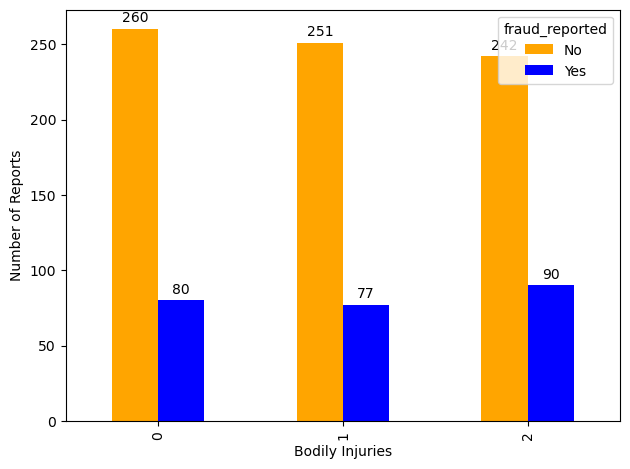

In [45]:
#custom colors
custom_colors = {'Yes': 'blue', 'No': 'orange', 'Y':'blue', 'N': 'orange'}

# Prepare data for plotting
plot_data = counts.unstack() if hasattr(counts, 'unstack') else counts

#Make sure colors match columns
col_order = plot_data.columns.tolist()
colors = [custom_colors.get(col, 'gray') for col in col_order]

for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.figure(figsize=(10,6))
ax = plot_data.plot(kind = 'bar', stacked = False, color = colors)

for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.xlabel('Bodily Injuries')
plt.ylabel('Number of Reports')
plt.tight_layout()
plt.show()

In [55]:
df.groupby('fraud_reported')['bodily_injuries'].value_counts(normalize=True)

fraud_reported  bodily_injuries
No              0                  0.345286
                1                  0.333333
                2                  0.321381
Yes             2                  0.364372
                0                  0.323887
                1                  0.311741
Name: proportion, dtype: float64

<Figure size 1000x600 with 0 Axes>

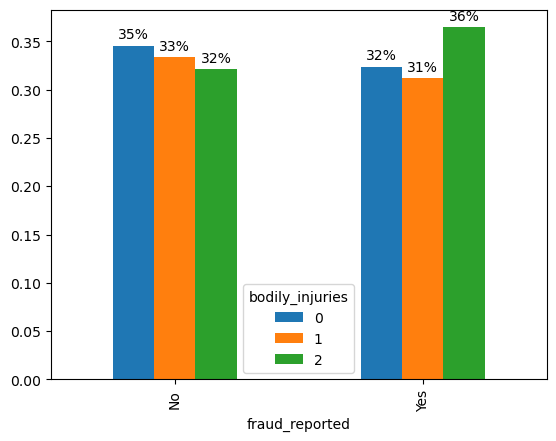

In [61]:
#lets visualize the proportions
plt.figure(figsize=(10,6))


# Prepare data for plotting
plot_data = df.groupby('fraud_reported')['bodily_injuries'].value_counts(normalize=True).unstack()
# Get the order of columns to match colors
col_order = plot_data.columns.tolist()
colors = [custom_colors.get(col, 'gray') for col in col_order]  
ax = plot_data.plot(kind='bar', stacked=False)
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.0f}%' for v in container], padding=3)

A higher number of bodily injuries is associated with a slightly higher likelihood of fraud, but bodily injuries alone are not a strong predictor—fraud occurs in every group, and most claims are not fraudulent regardless of the number of injuries.